### SSLAD 2021 Track 3A: Data Introduction

In this notebook there will be a short introduction on the data and the way it is streamed to the model in
the 3A track of the SSLAD ICCV 2021 challenge.

In [5]:
%matplotlib inline
from benchmark import create_train_set
import os
import matplotlib.pyplot as plt
from torchvision.transforms import ToTensor
from matplotlib.patches import Rectangle
import numpy as np
from PIL import Image
from collections import Counter

In [6]:
root = "../../data/SSLAD-2D/labeled/"
train_sets = create_train_set(root, img_size=64, avalanche=False, transform=ToTensor())

categories = {
    1: "Pedestrain",
    2: "Cyclist",
    3: "Car",
    4: "Truck",
    5: "Tram (Bus)",
    6: "Tricycle"
}

In [4]:
def visualize_stream(datasets, key, increment=500):

    values = []
    for ds in datasets:
        for sample in ds.samples:
            if key == "category":
                values.append(categories[sample.y])
            else:
                image_annot = ds.image_annot[ds.obj_annot[sample.id]["image_id"]]
                values.append(image_annot[key])

    counts = [Counter(values[i:i+increment]) for i in range(0, len(values), increment)]
    unique_values = set(values)

    bars = np.array([[c[uv] for c in counts] for uv in unique_values])
    bottom = np.zeros_like(bars[0])

    x = np.arange(0, len(bars[0]))
    for bar in bars:
        plt.bar(x, bar, bottom=bottom, width=0.8)
        bottom += bar

    plt.legend(unique_values, bbox_to_anchor=(1.01, 1.01))


The raw data are images, with their bbox annotations. For instance, see the image below.

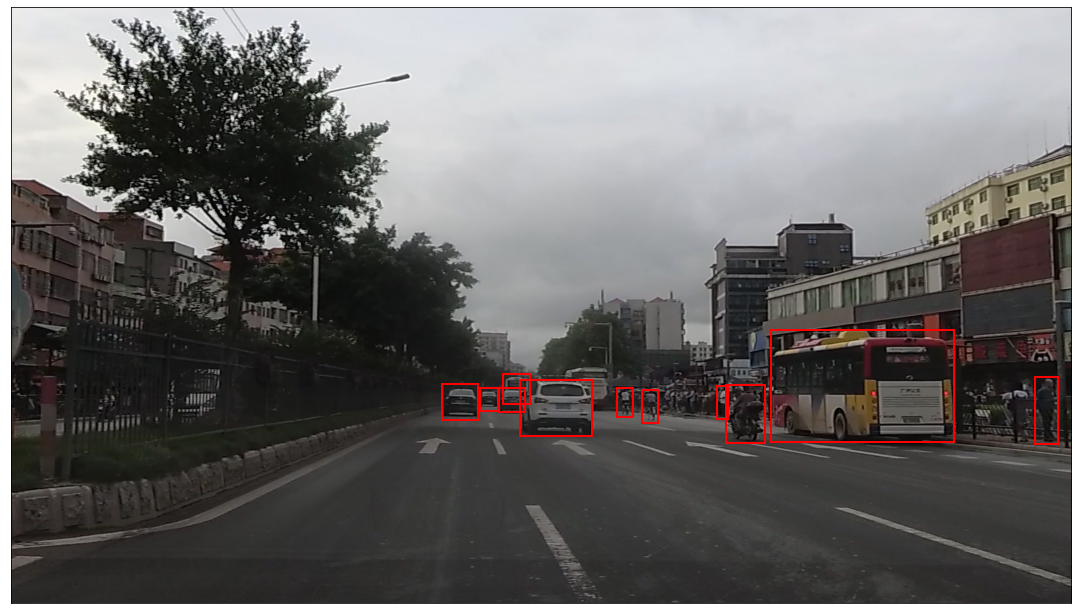

In [5]:
ds = train_sets[0]
img_index = 1109
img_annot = ds.get_image_annotation(img_index)
img_id = img_annot['id']
obj_ids = [obj for obj in ds.obj_annot if ds.obj_annot[obj]['image_id'] == img_id]

fig, ax = plt.subplots(1,1, figsize=(19, 11))
img = Image.open(os.path.join(ds.root, ds.split, img_annot['file_name']))
ax.imshow(img)

for obj in obj_ids:
    bbox = ds.obj_annot[obj]['bbox']
    ax.add_patch(Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], fill=False, lw=2, edgecolor='r'))

ax.set_xticks([])
ax.set_yticks([])
plt.show()

From these images, objects are cut out by taking the ground truth bounding box, making it square and
rescaling it to 64x64 pixels. The default transfrom (not shown) also normalizes the images.

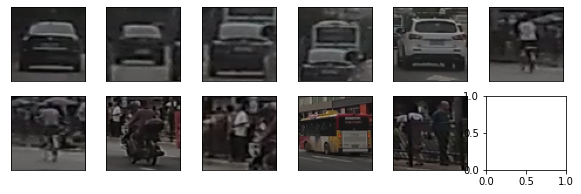

In [5]:
fig, axes = plt.subplots(2, 6, figsize=(10, 3))
iter_axes = iter(axes.flatten())
for i, obj in enumerate(ds.samples):
    if obj.id in obj_ids:
        next_axes = next(iter_axes)
        obj_img, _ = ds[i]
        obj_img = obj_img.detach().numpy()
        obj_img = np.moveaxis(obj_img, 0, 2)
        next_axes.imshow(obj_img)
        next_axes.set_xticks([])
        next_axes.set_yticks([])

plt.show()

The images used to cut out the objects are ordered in time over three days and nights. This has as a result
that the same objects will appear multiple times if they're visible in multiple frames. See for instance the
white car below. It is present in multiple frames, but from slightly different angles.

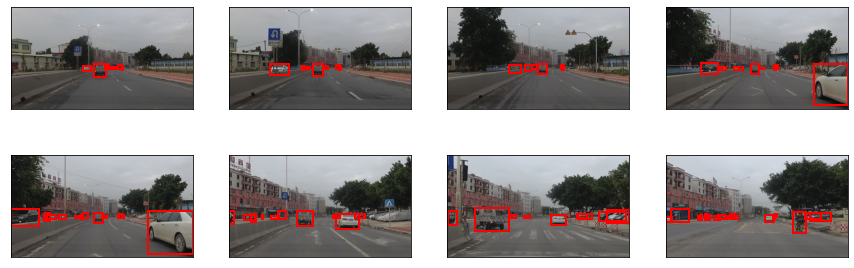

In [6]:
ds = train_sets[0]
fig, axes = plt.subplots(2, 4, figsize=(15, 5))
img_index = 3220

for ax in axes.flatten():
    img_annot = ds.get_image_annotation(img_index)
    img_id = img_annot['id']
    obj_ids = [obj for obj in ds.obj_annot if ds.obj_annot[obj]['image_id'] == img_id]

    img = Image.open(os.path.join(ds.root, ds.split, img_annot['file_name']))
    ax.imshow(img)

    for obj in obj_ids:
        bbox = ds.obj_annot[obj]['bbox']
        ax.add_patch(Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], fill=False, lw=2, edgecolor='r'))

    ax.set_xticks([])
    ax.set_yticks([])
    img_index += len(obj_ids)

plt.show()

Because of the chronological nature of the stream, there are multiple inbalancenesses in the data.
Overcoming these is what this challenge is about. Below, the inbalacenesses in objects' labels and
their domains are visualized.

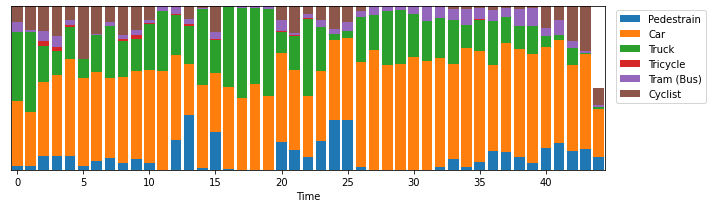

In [14]:
plt.figure(figsize=(10, 3))
visualize_stream(train_sets, key="category", increment=500)
plt.xlim((-0.5, 44.5))
plt.xlabel('Time')
plt.yticks([])
plt.tight_layout()
plt.savefig('./classes_shift.pdf')
plt.show()

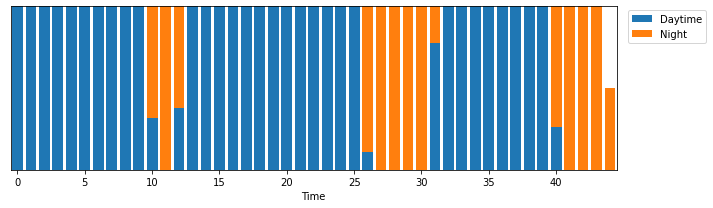

In [5]:
plt.figure(figsize=(10, 3))
visualize_stream(train_sets, key="period", increment=500)
plt.xlim((-0.5, 44.5))
plt.yticks([])
plt.xlabel('Time')
plt.tight_layout()
plt.savefig('./period_shift.pdf')
plt.show()
plt.show()

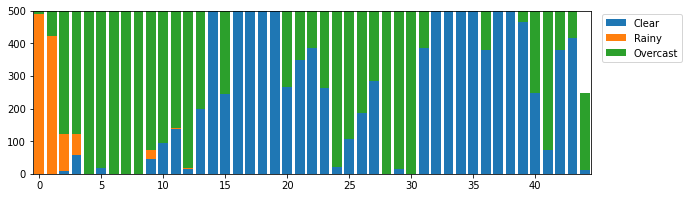

In [9]:
plt.figure(figsize=(10, 3))
visualize_stream(train_sets, key="weather", increment=500)
plt.xlim((-0.5, 44.5))
plt.show()

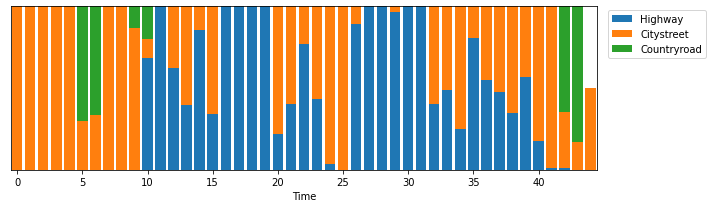

In [13]:
plt.figure(figsize=(10, 3))
visualize_stream(train_sets, key="location", increment=500)
plt.xlim((-0.5, 44.5))
plt.yticks([])
plt.xlabel('Time')
plt.tight_layout()
plt.savefig('./location_shift.pdf')
plt.show()

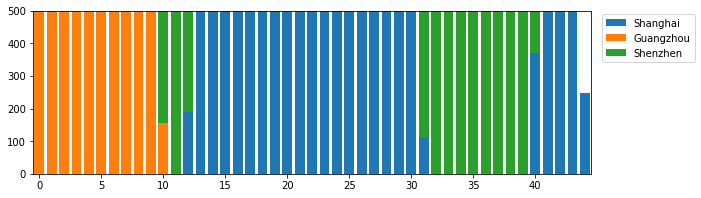

In [11]:
plt.figure(figsize=(10, 3))
visualize_stream(train_sets, key="city", increment=500)
plt.xlim((-0.5, 44.5))
plt.show()
